# Sales-Prediction Using Python


## TASK:-3

**Importing imp libraries**

In [7]:
import pandas as pd 
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor

In [8]:
import warnings
warnings.filterwarnings("ignore")

In [9]:
sp = pd.read_csv("advertising.csv.xls")
sp

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


### Analysing the data

In [10]:
sp.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [11]:
sp.tail()

,TV,Radio,Newspaper,Sales
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5
199,232.1,8.6,8.7,18.4


In [12]:
sp.shape

(200, 4)

In [13]:
sp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [14]:
sp.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [32]:
sp.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


In [36]:
sp["Sales"].value_counts()

Sales
11.9    5
16.7    5
20.7    4
11.0    3
11.3    3
       ..
13.4    1
24.2    1
8.1     1
5.5     1
25.5    1
Name: count, Length: 121, dtype: int64

In [38]:
P = sp.corr()
P

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.901208
Radio,0.054809,1.000000,0.354104,0.349631
Newspaper,0.056648,0.354104,1.000000,0.157960
Sales,0.901208,0.349631,0.157960,1.000000


In [32]:
sp.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


## Observstions

1. Highest average expense is on `TV`
2. Lowest average expense is lowest on `Radio`
3. Max sale is `27.000`
4. Min sale is `1.60000`

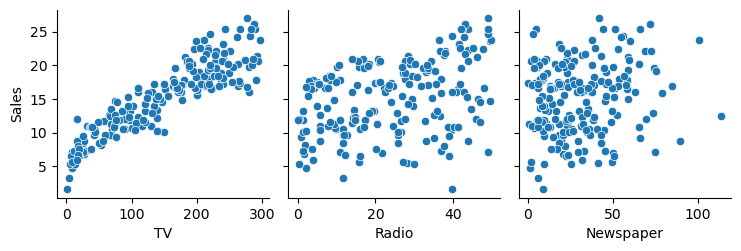

In [175]:
sns.pairplot(sp, x_vars=["TV", "Radio", "Newspaper"], y_vars="Sales", kind="scatter");

### Spliting the data

In [19]:
X = sp[["TV", "Radio", "Newspaper"]]
y = sp["Sales"]

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)
X.shape, X_train.shape, X_test.shape

((200, 3), (160, 3), (40, 3))

### Data Visualisation

In [42]:
sns.set(style="darkgrid")

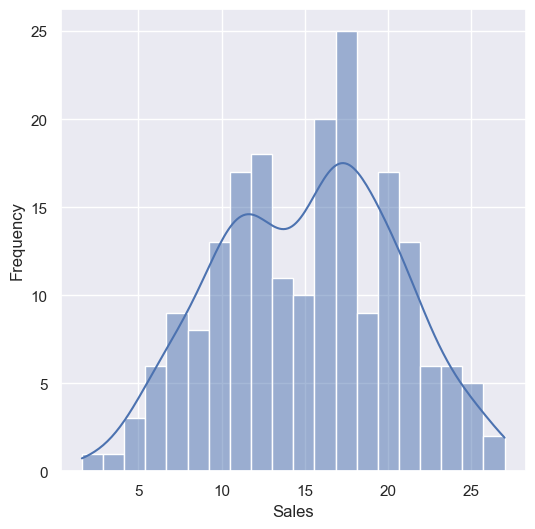

In [43]:
plt.figure(figsize=(6, 6))
sns.histplot(sp["Sales"], bins=20, kde=True)
plt.xlabel("Sales")
plt.ylabel("Frequency")
plt.show()

<Figure size 600x600 with 0 Axes>

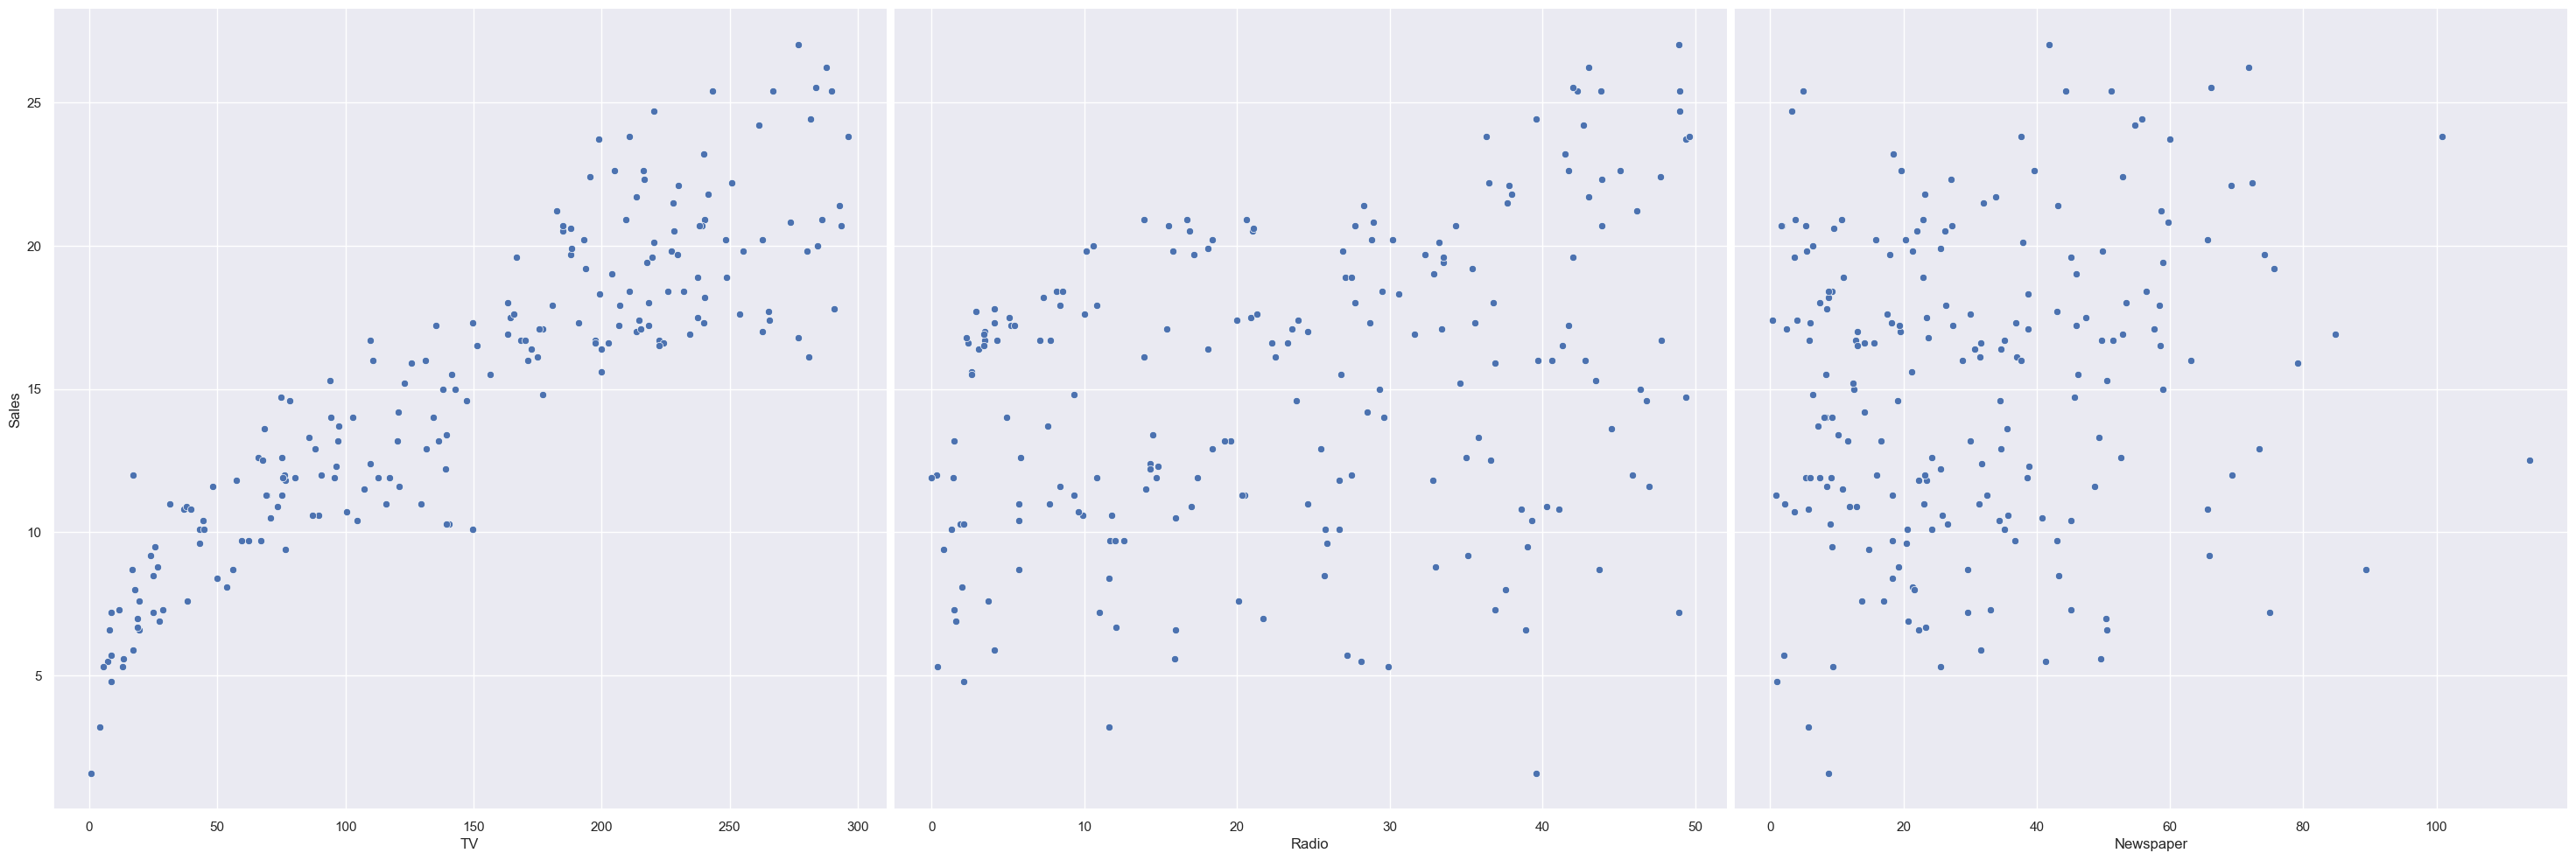

In [59]:
plt.figure(figsize=(6, 6))
sns.pairplot(sp, x_vars=["TV", "Radio", "Newspaper"], y_vars=["Sales"], height=10, aspect=1)
plt.show();

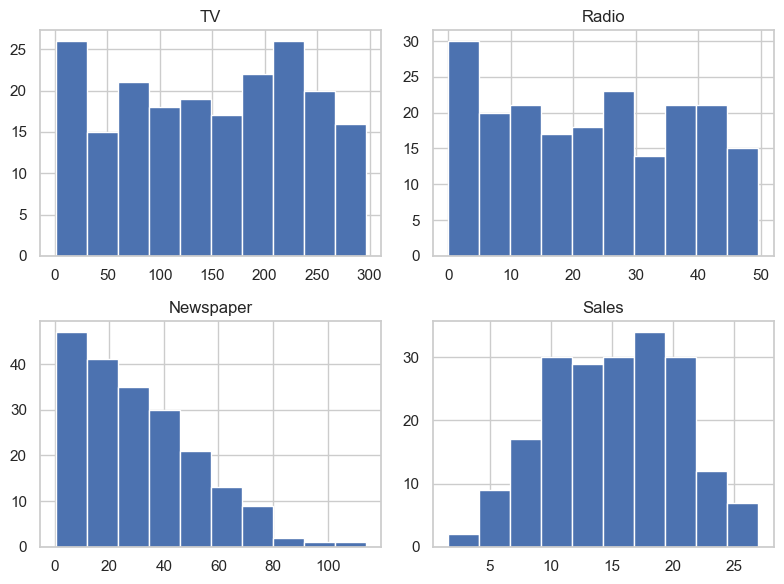

In [31]:
sp.hist(bins=10, figsize=(8,6))
plt.tight_layout()
plt.show()

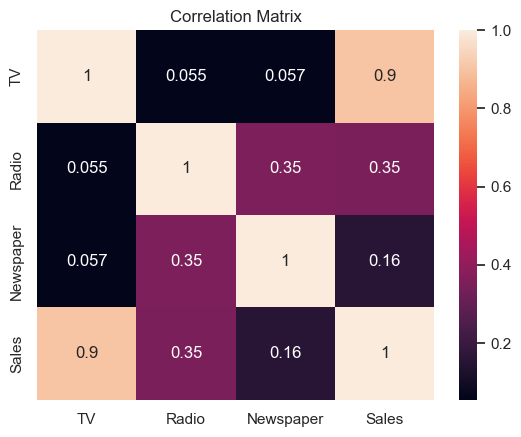

In [39]:
sns.heatmap(P, annot = True)
plt.title("Correlation Matrix")
plt.show()

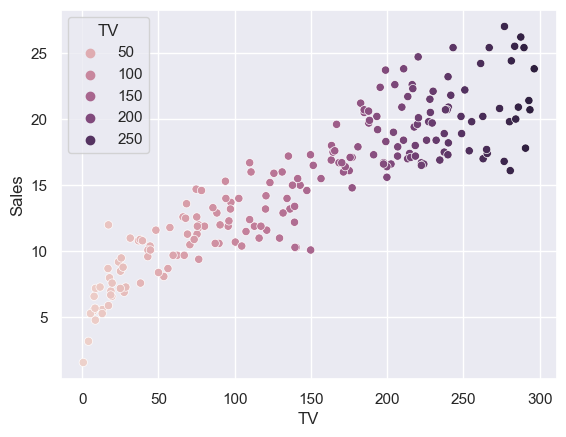

In [46]:
sns.scatterplot(x="TV", y="Sales", hue="TV", data=sp);

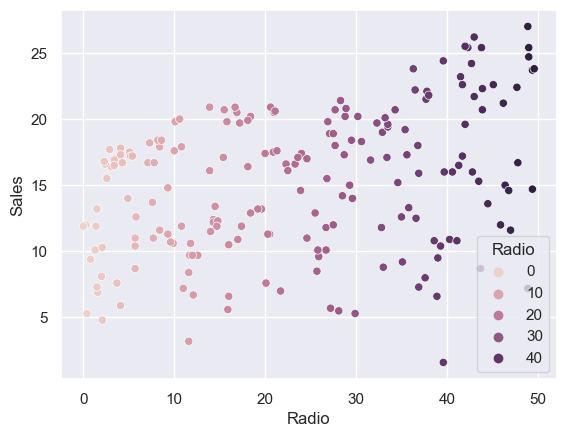

In [47]:
sns.scatterplot(x="Radio", y="Sales", hue="Radio", data=sp);

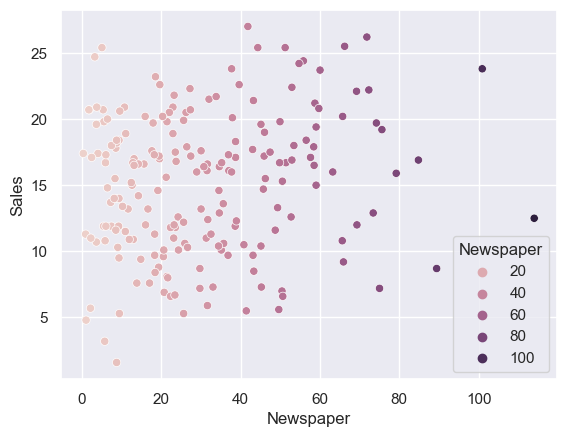

In [48]:
sns.scatterplot(x="Newspaper", y="Sales", hue="Newspaper", data=sp);

### Training Model

In [49]:
model = LinearRegression()

In [50]:
model.fit(X_train, y_train)

LinearRegression()

In [54]:
y_predict = model.predict(X_test)
y_predict

array([15.81794247, 10.15032354,  8.26737799, 18.25580684, 18.06466407,
       17.24354571,  8.81294515, 22.04513076, 12.38208193, 21.03691149,
        9.58287515, 20.13791992, 10.69692702,  9.05217041, 17.19403767,
       10.33653542,  8.63490536, 17.27389797, 18.24930692, 19.29279069,
       18.94026036, 19.46168254, 11.11298733, 10.6675807 , 18.0316489 ,
       14.58414874, 16.58323824,  9.27911751, 18.82160438, 17.18558892,
       20.11211809, 16.22950562, 15.87936272, 14.05507975,  7.89699942,
       12.12455603, 21.74608041, 21.4076981 , 19.58225049, 19.50042709])

In [55]:
mse = mean_squared_error(y_test, y_predict)
mse

3.0917213303227387

In [57]:
random = RandomForestRegressor(random_state=42)

In [60]:
random.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [61]:
z = random.predict(X_test)
z

array([17.154, 11.252,  8.286, 18.174, 19.472, 18.242,  9.032, 19.571,
       13.41 , 18.965,  8.236, 18.858, 11.908,  6.507, 17.467,  7.921,
        7.699, 17.257, 18.216, 18.559, 19.519, 18.019, 10.509, 10.513,
       17.505, 16.498, 16.806, 10.902, 18.761, 17.469, 18.02 , 15.569,
       16.74 , 13.147,  4.275, 11.887, 22.916, 19.666, 17.057, 21.42 ])

In [62]:
mse = mean_squared_error(y_test, z)
mse

1.6319516999999952

In [64]:
r2 = r2_score(y_test, y_predict)
r2

0.8407131803267818